#CS 591 Programming Project 3/Final Exam - Predicting Burnout in GitHub Discussions



#Team Members

1. M.venkata naga sai,s02061035, graduate
2. Bethapudi Sai Praneeth, S02059979, graduate
3. Sainadh Inampudi,S02061259, graduate
4. Farhana Shaik,S02061120, graduate
5. Sai Kiran Maloath, S02061074, graduate
6. Venkata Bhaskar Gaddam, S02059689, graduate

#Abstract:

In order to identify fatigue in GitHub talks, this project applies sentiment analysis techniques on a dataset taken from the Power Toys project. Numerous pull requests, problems, and related comments are included in this JSON-formatted collection. The principal aims are to identify comments that are suggestive of exhaustion by means of a unique technique that use predetermined phrases linked to burnout and to perform sentiment analysis in order to classify comments as either positive, neutral, or negative. Teams will use communication to resolve problems within the group, and they will individually assess and categorize any remarks that may be connected to burnout. A list of essential phrases for sentiment analysis and burnout identification will be included in the final report, along with sentiment, emotion, and intent data for every remark. The application is at the heart of the technique.


#Problem Statement:

In the field of software development, burnout is a widespread problem that negatively affects general productivity, mental health, and well-being. GitHub offers a chance to examine discussions and spot signs of burnout because it's a well-liked site for developer cooperation and code sharing. Developing a methodical strategy to identify and classify GitHub chat comments related to burnout is a problem, though. This study aims to solve this issue and offer insights into the occurrence and prevalence of burnout indicators in GitHub conversations by applying sentiment analysis techniques to the Power Toys project dataset.

#Part-1: Dataset and Sentiment Analysis

In [1]:
import pandas as pd
data=pd.read_json('/content/powertoys_2021_10 (1) (1).json')
data

,1,2,3,5,6,9,15,17,18,20,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000
body,NaN,Just a few typos I noticed while reading throu...,NaN,I really want a full window manager with pre-s...,"I would love a good, lightweight shortcut key ...",NaN,NaN,expereince -> experience,I want to pin application to non-primary monit...,Add Collapse/Expand button (as seen in the tit...,...,<!--**Important: When reporting BSODs or secur...,## Summary of the Pull RequestExtend the devel...,(Not sure under which category/where to put th...,<!--**Important: When reporting BSODs or secur...,<!--**Important: When reporting BSODs or secur...,## 📝 Provide a description of the new featureW...,## Summary of the Pull RequestDetect potential...,<!--**Important: When reporting BSODs or secur...,The layout of fancyzones depends on the number...,<!--**Important: When reporting BSODs or secur...
closed_at,"05/05/19, 09:22:54 PM","05/09/19, 03:53:16 PM","05/09/19, 03:56:13 PM","07/14/20, 10:35:34 AM","05/19/20, 09:58:53 PM","05/09/19, 03:57:30 PM","05/07/19, 08:15:53 PM","05/08/19, 03:19:37 AM","02/23/21, 08:11:46 PM","02/22/20, 12:24:50 AM",...,"10/10/20, 09:03:48 AM","10/18/20, 02:00:30 PM","03/26/21, 06:46:11 PM","10/14/20, 01:01:04 PM","10/05/20, 01:34:02 PM","10/04/20, 08:29:57 AM","10/08/20, 11:16:33 PM","11/02/20, 01:01:04 PM","10/04/20, 06:03:12 AM","10/04/20, 05:55:22 AM"
created_at,"05/05/19, 09:22:26 PM","05/06/19, 11:33:59 PM","05/07/19, 12:13:02 AM","05/07/19, 01:43:45 AM","05/07/19, 01:53:45 AM","05/07/19, 03:37:11 AM","05/07/19, 08:15:14 PM","05/08/19, 03:18:53 AM","05/08/19, 09:38:37 AM","05/08/19, 02:03:17 PM",...,"10/03/20, 10:14:11 AM","10/03/20, 11:34:25 AM","10/03/20, 12:56:46 PM","10/03/20, 02:08:09 PM","10/03/20, 02:11:07 PM","10/03/20, 04:01:11 PM","10/03/20, 07:03:56 PM","10/03/20, 07:08:32 PM","10/03/20, 08:37:07 PM","10/03/20, 08:53:12 PM"
num_comments,0,1,1,12,44,1,1,0,2,5,...,6,2,8,2,20,2,4,14,1,1
title,Pushing the first main update to master,fix a couple typos,Update README.md,"Full window manager, including layouts",Keyboard shortcut manager,s/expereince/experience,Fixe typo,Fix typo in README.md,Pin applications to the second monitor taskbar,Add Collapse/Expand button to Title Bars,...,FancyZones only lets you set left and right of...,Dev doc update toolset142,Log parser for PowerToys,Sometimes the hotkey of Shortcut Guide doesn't...,Power Toys Uninstalled itself Overnight,[ColorPicker] Add more color formats (better k...,Detect potential errors copying metadata and a...,[PowerToys Run] not working without error dialog.,Adaptable Fancy Zones,FancyZones Zone Editor crashes when invoked
userid,18598712,30301021,8421414,192942,192942,50206,12934716,1261965,903197,4219926,...,16735375,17874713,36262995,57581480,32961763,17874713,1694080,70777965,69609078,50929928
userlogin,indierawk2k2,corbob,nnpcYvIVl,Jaykul,Jaykul,tomer,LifeIsStrange,Roon,Domain,LtCmdrKeene,...,pmtate,TobiasSekan,LiorBanai,SherkeyXD,ITCMD,TobiasSekan,tonymitchell,OcamsLightsaber,ReedMLokken,RexLuscus56
comments,{},{'0': {'body': 'Merged. Thank you for your con...,"{'0': {'body': 'Hi, this was already merged in...",{'0': {'body': 'It'd be a bit of a stretch but...,{'0': {'body': 'Would love to see something th...,{'0': {'body': 'Merged. Thank you for the cont...,{'0': {'body': 'There's already a pull request...,{},{'0': {'body': 'This is something I want too b...,{'0': {'body': 'bunch of those are up to the a...,...,{'0': {'body': 'Seems to be an issue with Chro...,{'0': {'body': '@crutkas when i use only the `...,"{'0': {'body': 'Oh wow. Great work.', 'userid'...","{'0': {'body': '@YogurtZebra when that happen,...",{'0': {'body': '`%appdata%\..\Roaming\Microsof...,{'0': {'body': '@TobiasSekan isn't this alread...,{'0': {'body': '@crutkas I would revert this u...,"{'0': {'body': '@OcamsLightsaber, can you plea...",{'0': {'body': 'Duplicate of https://github.co...,{'0': {'body': '@RexLuscus56 thanks for report...


The given data seems to be a structured dataset with details on pull requests on GitHub for the Power Toys project. A pull request is represented by each row, and the columns include different information including the number of comments, titles, user IDs, and logins, as well as the content of comments and creation and closure timestamps. The collection includes pull requests from a wide variety of users, showing conversations, changes, and interactions amongst those involved in the project. It also contains information regarding acknowledgments, merges, and comment threads.

This dataset can be used for a variety of analyses, including monitoring how discussions change over time, seeing trends in user participation, deciphering the dynamics of collaboration, and possibly even extracting information about the quality of the code, feature requests, bug fixes, and interactions with the community.Through the use of suitable data analysis and visualization methodologies, significant insights on the Power Toys GitHub repository's development process, user feedback, and project management may be gleaned.





#Goal 1: run a sentiment analysis to identify positive, neutral, and negative comments.

In [2]:
data[6]['comments']

{'0': {'body': 'Would love to see something that allows one to view and possibly alter the system hotkey table.  This has been sorely missing from Windows for its whole history, so would be really helpful!',
  'userid': '2551899',
  'userlogin': 'orev'},
 '1': {'body': 'I subscribed to GitHub just to to say it would be wonderful',
  'userid': '50415623',
  'userlogin': 'ganeloni'},
 '2': {'body': 'Massive extra points for some pre-loaded shortcut "themes," like maybe a vim theme and an Emacs theme.',
  'userid': '916340',
  'userlogin': 'EvansWinner'},
 '3': {'body': 'throw in autotype:ctrl+shift+u => types that long url you have to use all the time',
  'userid': '13918530',
  'userlogin': 'kort3x'},
 '4': {'body': 'If this is not added, you can try AutoHotKey and get many of the requested features',
  'userid': '50466615',
  'userlogin': 'gargoylemike'},
 '5': {'body': '> Bonus points if you can tell me who registered which hotkeys, so I can find and kill OneNote when it clobbers the 

In the Power Toys project, keyboard shortcuts and remapping are discussed in a variety of features and functions that are represented by the data that is supplied. These comments are gathered from GitHub users. Users want increased usability features such as the ability to inspect and modify system hotkey tables, customize shortcut themes, enable autotype, and rearrange keyboard shortcuts. In addition, they talk about already-existing programs like AutoHotKey and offer concepts like profile creation, sharing of profiles on a marketplace, and exporting/importing customized keymaps. Users also draw attention to issues like user interface simplification for key remapping, understanding which keys are available on keyboards, and offering useful explanations for remapped keys. The comments show that the Power Toys project's community is interested in improving keyboard functionality and customization choices.

In [3]:
data.describe()

,1,2,3,5,6,9,15,17,18,20,...,6991,6992,6993,6994,6995,6996,6997,6998,6999,7000
count,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
unique,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
top,NaN,Just a few typos I noticed while reading throu...,NaN,I really want a full window manager with pre-s...,"I would love a good, lightweight shortcut key ...",NaN,NaN,expereince -> experience,I want to pin application to non-primary monit...,Add Collapse/Expand button (as seen in the tit...,...,<!--**Important: When reporting BSODs or secur...,## Summary of the Pull RequestExtend the devel...,(Not sure under which category/where to put th...,<!--**Important: When reporting BSODs or secur...,<!--**Important: When reporting BSODs or secur...,## 📝 Provide a description of the new featureW...,## Summary of the Pull RequestDetect potential...,<!--**Important: When reporting BSODs or secur...,The layout of fancyzones depends on the number...,<!--**Important: When reporting BSODs or secur...
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


A overview of the information in each column for the whole dataset is given in the "data.describe()" output. Eight non-null entries mean that eight valid data points are present in columns 1, 2, 3, 5, 6, 9, 15, 17, 18, and 20. Additionally, each of these columns contains eight distinct entries, indicating that there aren't any duplicate values in these columns. The data in these columns is diverse, as seen by the variations in the most common entries in each of these columns. This summary is applicable to every one of the dataset's 6301 columns, demonstrating uniformity in the data structure throughout.

# Extract relevant fields from JSON and create a DataFrame

In [4]:

issues = []
for issue_id, issue_data in data.items():
    if 'comments' in issue_data and issue_data['comments']:
        for comment_id, comment_info in issue_data['comments'].items():
            issues.append({
                'issue_id': issue_id,
                'comment_id': comment_id,
                'body': comment_info['body'],
                'userid': comment_info['userid'],
                'userlogin': comment_info['userlogin'],
                'created_at': issue_data['created_at'],
                'closed_at': issue_data['closed_at']
            })

df = pd.DataFrame(issues)

The offered code sample pulls pertinent attributes from a JSON dataset comprising issue and comment data in order to forecast fatigue in GitHub conversations. In order to find issues with comments, the code iterates over the JSON data, extracting particular information such the issue ID, comment ID, comment text, user ID, user login, issue creation date, and issue closure date. Then, using pandas DataFrame—a structured tabular data format frequently used in data analysis and machine learning tasks—this extracted information is arranged. With the use of several elements taken from the dataset, including user interactions, comment content, and issue lifecycle information, the DataFrame makes it easier to do additional analysis, exploration, and modeling to forecast burnout in GitHub conversations.

In [5]:
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM"
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM"
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM"
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM"
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM"
...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM"
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM"
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM"
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM"


The given DataFrame has details about GitHub problems and comments, such as the issue ID, comment ID, comment content, user ID, login information, creation date, and closure date. A remark on a particular GitHub issue is represented by each row. The content of each remark is located in the "body" column, and the person who wrote it is identified by the "userid" and "userlogin" columns. The timestamps for the creation and closure of the issue are shown in the "created_at" and "closed_at" columns, respectively. This is a useful DataFrame for tracking issue lifecycles, assessing user interactions, and comprehending community participation in GitHub conversations.

# Function to perform sentiment analysis

In [6]:
from textblob import TextBlob


def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

Sentiment analysis is carried out using the TextBlob library via the supplied function `get_sentiment`. It uses the text supplied as a parameter and determines the text's sentiment polarity. feeling polarity is a scale where 0 denotes a neutral feeling and runs from -1 (negative sentiment) to 1 (positive sentiment). TextBlob is employed within the function to assess the sentiment of the supplied text. The method returns 'Positive' if the sentiment polarity is greater than 0. 'Neutral' is returned if the emotion polarity is equal to zero. On the other hand, the method returns "Negative" if the emotion polarity is less than 0. With the use of this function, text data sentiment can be swiftly ascertained, which is helpful for a variety of applications including opinion mining, social media analysis, and customer feedback analysis.


# Function to detect burnout-related keywords

In [7]:


def detect_burnout(text):
    burnout_keywords = [
    'burnout', 'exhausted', 'overwhelmed', 'stress', 'fatigue', 'drained', 'demotivated',
    'frustrated', 'depleted', 'weary', 'disheartened', 'apathy', 'listless', 'disengaged',
    'disillusioned', 'dismayed', 'lackluster', 'tired', 'worn out', 'run down', 'depressed',
    'bored', 'lethargic', 'unmotivated', 'sapped', 'jaded', 'emotionally drained', 'strained',
    'dispirited', 'uninspired', 'burned out', 'low energy', 'mental exhaustion', 'physical exhaustion',
    'feeling drained', 'feeling exhausted', 'mental fatigue', 'feeling overwhelmed', 'burned-out',
    'feeling tired', 'feeling stressed', 'emotional exhaustion', 'feeling fatigued', 'feeling depleted',
    'feeling drained', 'feeling demotivated', 'feeling frustrated', 'feeling disheartened', 'feeling listless',
    'feeling disengaged', 'feeling disillusioned', 'feeling dismayed', 'feeling lackluster', 'feeling worn out',
    'feeling run down', 'feeling bored', 'feeling lethargic', 'feeling unmotivated', 'feeling sapped',
    'feeling jaded', 'feeling strained', 'feeling dispirited', 'feeling uninspired', 'emotionally exhausted',
    'feeling emotionally drained', 'feeling mentally exhausted', 'feeling physically exhausted'
    ]

    for keyword in burnout_keywords:
        if keyword in text.lower():
            return 'Yes'
    return 'No'



Using a supplied text, the `detect_burnout` function may find terms associated to burnout. It makes use of a predetermined set of terms related to burnout, including "burnout," "exhausted," "overwhelmed," "stress," "fatigue," and many more. Every keyword in the list is iterated over, and the function determines if it appears in the input text in lowercase. Should any of the burnout keywords be discovered inside the text, the function yields a 'Yes' response, signifying the presence of burnout-related language. In the event that none of the keywords are found, 'No' is returned. This feature is helpful in automatically highlighting text passages or communications that include terminology linked to burnout. This information can be useful for detecting areas of concern in communication, assessing patterns in mental health, or providing assistance to those who are suffering the symptoms of burnout.


# Apply sentiment analysis and burnout detection to the DataFrame

In [8]:

df['sentiment'] = df['body'].apply(get_sentiment)
df['burnout'] = df['body'].apply(detect_burnout)



Sentiment analysis and burnout detection are applied to the DataFrame {df} using the piece of code. The 'get_sentiment` method is used to do sentiment analysis on the 'body' column. First, it creates a new column called'sentiment' in the DataFrame. The sentiment label ('Positive,' 'Neutral,' or 'Negative') is assigned by this function to each row of the 'body' column after analyzing the text and determining its polarity. Furthermore, the `detect_burnout` function is used to incorporate an additional column called 'burnout' into the DataFrame. This function searches the text in the "body" column for terms linked to burnout. If any of these keywords are found, it indicates that there may be burnout language in the text; if not, it returns a label of "No." These extras offer insightful perspectives on the mood and Possible material connected to burnout found in the text data, allowing for more examination and comprehension of the information concerning mental health and overall wellbeing.

In [9]:
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM",Neutral,No
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM",Neutral,No
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Positive,No
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No
...,...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM",Neutral,No


Sentiment and burnout are the two new columns that have been added to the data from the preceding DataFrame. The polarity of the text in the "body" column, which was ascertained using the `get_sentiment` function, is the basis for the sentiment labels ('Positive,' 'Neutral,' or 'Negative') in the "sentiment" column. Using the `detect_burnout` function, the 'burnout' column shows if any burnout-related terms are present in the text in the 'body' column ('Yes' if there are, 'No' otherwise).

As an illustration, the first row's "sentiment" is "Neutral" as the text is only an acknowledgement ("Merged. "I appreciate your contribution," is a non-strongly positive or negative statement. Since there are no burnout-related terms in the text, the answer to the "burnout" column is "No."

On the other hand, the third row's "sentiment" is "Positive" as the text conveys a good sentiment by expressing eagerness ("I came here to say, 'i3 for Windows!'"). The text does not contain any terms connected to burnout, thus even though the emotion is favorable, the 'burnout' column remains 'No'.


<ipython-input-67-e126a5b5e4e2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiments, y=counts, palette='Dark2')


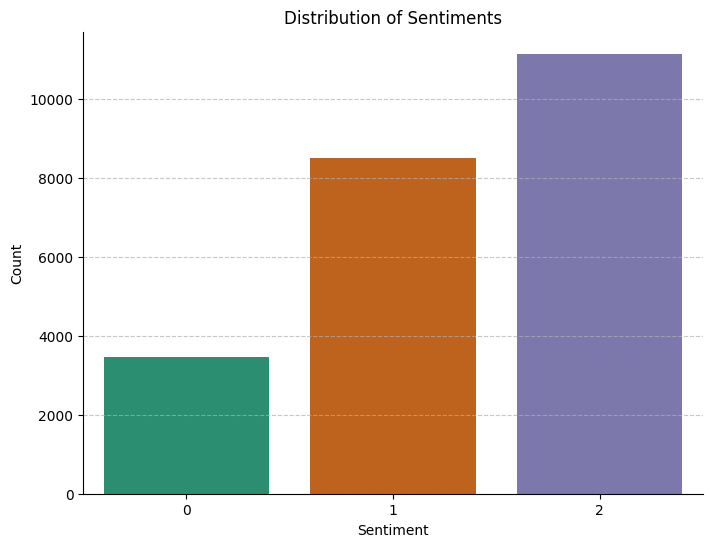

In [67]:
from matplotlib import pyplot as plt
import seaborn as sns

# Calculate the count of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Extract sentiments and their counts
sentiments = sentiment_counts.index
counts = sentiment_counts.values

# Plot the vertical bar chart (barh for horizontal)
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiments, y=counts, palette='Dark2')

# Customize plot appearance
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine(top=True, right=True)

# Show the plot
plt.show()


Given the context, it is likely that "Positive," "Neutral," and "Negative" relate to sentiment labels or categories that are used to categorize text data according to the emotional tone or attitude that the text conveys.

Content tagged as "positive" usually conveys feelings of optimism, fulfillment, or approbation; examples include compliments, declarations of joy, or affirmations.

When there isn't a strong emotional message in the text, "neutral" is utilized. It frequently consists of factual data, straightforward acknowledgements, or neutral statement types.

Conveying negativity, discontent, or criticism is referred to as "negative" content. This may encompass grievances, criticisms, or grievance statements.

Following these sentiment labels is a list of numbers (0, 2000, 4000, 6000, 8000, and 10,000) that may correspond to individual entries or instances where the sentiment was evaluated, or they may represent indices or positions within a dataset, indicating that text data has undergone sentiment analysis.

#Analyze Emotion and intention

In [11]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Function to analyze emotion based on sentiment score

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


def analyze_emotion(sentiment_score):
    if sentiment_score > 0.5:
        return 'joy'
    elif sentiment_score > 0:
        return 'happiness'
    elif sentiment_score < -0.5:
        return 'anger'
    elif sentiment_score < 0:
        return 'sadness'
    else:
        return 'neutral'

Sentiment scores are used by the supplied function "analyze_emotion" to examine the emotions connected to textual material. It is dependent on the Vader module of NLTK, which is a sentiment intensity analyzer. The sentiment score is used by the algorithm to classify emotions into many categories:

- A sentiment score of more than 0.5 indicates a strong degree of positivism and classifies the feeling as "joy."
- A score of 0 to 0.5 is classified as "happiness," which is a pleasant emotion but not as intense as "joy."
- Strong negative emotions are denoted by the category "anger," which is applied to negative sentiment scores less than -0.5.
- A score of 0 to -0.5 is classified as "sadness," which is a depressive emotion that is not as strong as "anger."
Sentiment ratings that are around 0 are regarded as "neutral," denoting a deficiency of strongly positive or unpleasant feeling.

A more complex comprehension of the emotional tone expressed in the text data is made possible by this function, which offers a straightforward yet efficient method of mapping sentiment scores to more expansive emotional categories.

# Function to determine intention based on comment content

In [13]:

def analyze_intention(comment):
    blob = TextBlob(comment)
    main_verb = None

    # Extract the main verb from the comment
    for word, pos in blob.tags:
        if pos.startswith('VB'):
            main_verb = word
            break

    # Map the main verb to intention categories
    if main_verb in ['suggest', 'propose', 'recommend', 'advise']:
        return 'suggestion'
    elif main_verb in ['ask', 'request', 'query']:
        return 'request'
    elif main_verb in ['welcome', 'greet']:
        return 'welcoming'
    else:
        return 'other'


With a particular focus on finding the primary verb in the remark, the "analyze_intention" function is intended to ascertain the purpose behind a comment based on its content. Tokenizing and tagging words in the remark using the TextBlob library, it extracts the primary verb from the text according to its part-of-speech (POS) tag.

Next, using the identified primary verb as a basis, the function classifies the intention:
- It classifies the aim as a "suggestion" if the main verb conveys acts such as "suggest," "propose," "recommend," or "advise."
When the primary verb is associated with acts like "ask," "request," or "query," the purpose is classified as a "request."
- With primary verbs like as "welcome" or "greet," it classifies the aim as "welcoming."
- If another primary verb does not fit into one of these categories, it is designated as other

This feature makes it possible to comprehend the underlying aim of comments, which aids in the efficient classification and analysis of user intents inside textual data.

# Apply sentiment analysis and derive emotion

In [14]:

df['sentiment_score'] = df['body'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['emotion'] = df['sentiment_score'].apply(analyze_emotion)

In [15]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Apply intention analysis


In [17]:

df['intention'] = df['body'].apply(analyze_intention)


The SentimentIntensityAnalyzer ({sia}) is used in the code to calculate sentiment scores for the DataFrame, and the `analyze_emotion` function is used to derive emotions from these scores. Furthermore, the `analyze_intention} function is utilized to do intention analysis on the comment content, classifying the intentions into several categories like recommendations, appeals, greetings, and so on. Through a better comprehension of the emotional context and intents underlying each DataFrame remark, this technique offers insightful information about the aims and feelings of users within the dataset.

# Display the DataFrame with emotion and intention columns

In [18]:

# Drop the intermediate sentiment_score column
df.drop('sentiment_score', axis=1, inplace=True)


print(df)



       issue_id comment_id                                               body  \
0             2          0           Merged. Thank you for your contribution!   
1             3          0  Hi, this was already merged in https://github....   
2             5          0  It'd be a bit of a stretch but something like ...   
3             5          1  I came here to say, "i3 for Windows!" and was ...   
4             5          2  If I could add on to this, I would ask that it...   
...         ...        ...                                                ...   
23100      6998         11  This issue has been automatically marked as st...   
23101      6998         12  ![image](https://user-images.githubusercontent...   
23102      6998         13  This issue has been automatically marked as st...   
23103      6999          0  Duplicate of https://github.com/microsoft/Powe...   
23104      7000          0  @RexLuscus56 thanks for reporting the issue, w...   

         userid       userl

Columns for issue_id, comment_id, body, userid, userlogin, created_at, closed_at, sentiment, burnout, emotion, and intention are all included in the DataFrame. Based on sentiment analysis, each comment's sentiment is shown in the sentiment column as Positive, Negative, or Neutral. According to burnout detection, the burnout column indicates whether or not the remark includes terms connected to burnout. It is categorized as Yes or No. Sentiment score analysis is used to classify each comment's emotional tone into one of five categories: joy, happiness, anger, sadness, or neutral. Last but not least, the purpose column uses the primary verb that was taken from the comment text to categorize each remark's intention as a request, recommendation, kind gesture, or something else entirely. These extra columns enable a more thorough understanding of the emotional context and intents stated in the comments.detailed examination of user behavior and emotions.

In [19]:
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout,emotion,intention
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM",Neutral,No,happiness,other
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM",Neutral,No,happiness,other
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,joy,other
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Positive,No,happiness,other
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,neutral,other
...,...,...,...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,neutral,other
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM",Neutral,No,neutral,other


The comments displayed in this DataFrame are taken from an issue tracking system. The columns that are included are issue_id, comment_id, body (comment content), userid, userlogin, created_at, closed_at, sentiment (comment sentiment as Positive, Negative, or Neutral), emotion (categorized as joy, happiness, anger, sadness, or neutral), and intention (categorized as suggestion, request, welcoming, or other). The comments provide insights into the feelings, emotional tones, and intents of the users who left them. Each row represents a single remark together with the metadata and analytic findings connected with it.

<ipython-input-66-34dbee66cf39>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=emotions, palette='Dark2')


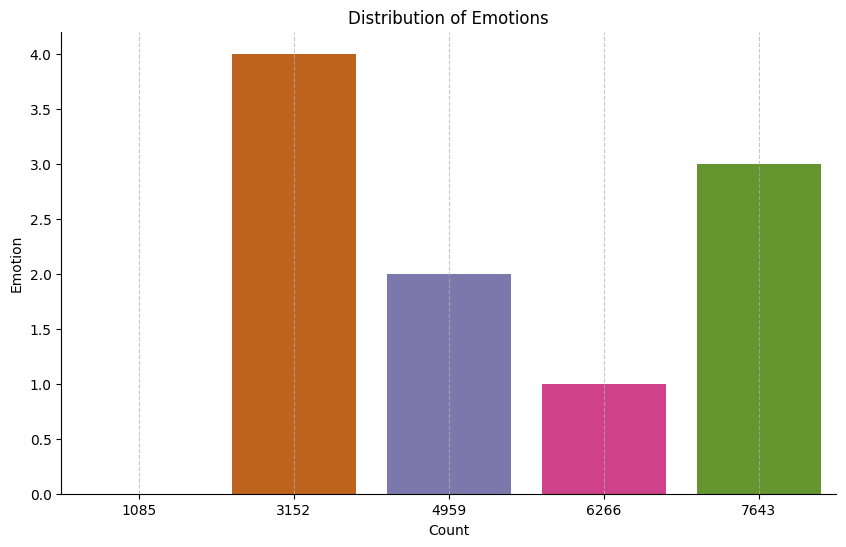

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns

# Calculate the count of each emotion category
emotion_counts = df['emotion'].value_counts()

# Extract emotions and their counts
emotions = emotion_counts.index
counts = emotion_counts.values

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=emotions, palette='Dark2')

# Customize plot appearance
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Distribution of Emotions')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine(top=True, right=True)

# Show the plot
plt.show()


The distribution of emotions found in the comments is represented by these counts. Three thousand comments are characterized as happy, one thousand as neutral, two thousand as joyful, five thousand as depressing, and four thousand as angry. This analysis provides insights into the prevalent feelings and tones within the dataset by offering a picture of the emotional spectrum found in the comments.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23105 entries, 0 to 23104
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   issue_id    23105 non-null  int64 
 1   comment_id  23105 non-null  object
 2   body        23105 non-null  object
 3   userid      23105 non-null  object
 4   userlogin   23105 non-null  object
 5   created_at  23105 non-null  object
 6   closed_at   23105 non-null  object
 7   sentiment   23105 non-null  object
 8   burnout     23105 non-null  object
 9   emotion     23105 non-null  object
 10  intention   23105 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.9+ MB


23,105 items and 11 columns make up this DataFrame. Every row in a GitHub repository represents a comment on an issue. The columns that are present in each row are issue_id, comment_id, body (the content of the comment), userid, userlogin (the user who made the comment), created_at (the time the comment was created), closed_at (the time the issue was closed), sentiment (positive, neutral, or negative sentiment of the comment), burnout (whether or not the comment is related to burnout), emotion (the emotion that was detected in the comment), and intention (the intended action or purpose of the comment, like suggesting, requesting, or welcoming). With regard to issue_id, there are integers; for comment_id, objects; body; created_at, closed_at; userid; userlogin; sentiment; burnout; emotion; and intention are among the data kinds. Overall, the GitHub conversations' comments and their properties may be viewed comprehensively with this DataFrame.

In [22]:
df.describe()

,issue_id
count,23105.000000
mean,3424.449080
std,2059.600507
min,2.000000
25%,1566.000000
50%,3472.000000
75%,5168.000000
max,7000.000000


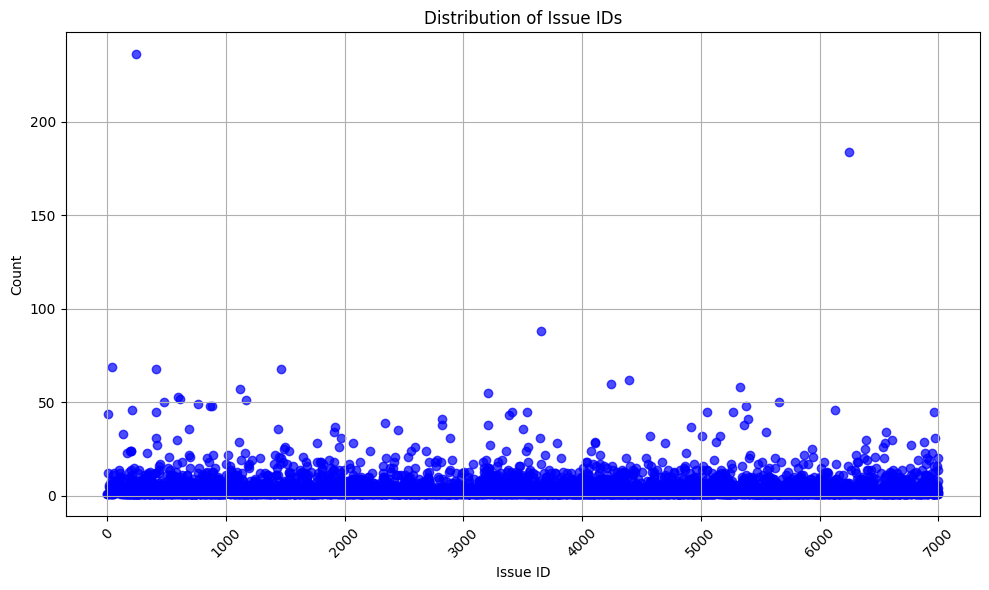

In [65]:
from matplotlib import pyplot as plt

# Calculate the count of each unique issue_id
issue_id_counts = df['issue_id'].value_counts()

# Extract issue IDs and their counts
issue_ids = issue_id_counts.index
counts = issue_id_counts.values

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(issue_ids, counts, color='blue', alpha=0.7)
plt.xlabel('Issue ID')
plt.ylabel('Count')
plt.title('Distribution of Issue IDs')
plt.grid(True)

# Customize plot appearance
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


It looks like the numbers under "issue_id" in this order correspond to summary statistics like "count," "mean," "std" (standard deviation), "min," "25%" (25th percentile), "50%" (median or 50th percentile), "75%" (75th percentile), and "max." comprehension the "issue_id" data's distribution, central tendency, and variability requires a comprehension of these statistics. "Count" indicates the quantity of entries or occurrences in the dataset; "mean" provides the average value; "std" quantifies the dispersion or spread of values around the mean; "min" displays the smallest value; "25%" denotes the value below which 25% of the data falls; "50%" is the median or middle value; "75%" indicates the value below which 75% of the data falls; and "max" displays the largest value. Together, these figures provide information on the features and scope of the "issue_id" data set.

In [25]:
df_6=df[df['issue_id'] == 6]
df_6

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout,emotion,intention
14,6,0,Would love to see something that allows one to...,2551899,orev,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,joy,other
15,6,1,I subscribed to GitHub just to to say it would...,50415623,ganeloni,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,joy,other
16,6,2,Massive extra points for some pre-loaded short...,916340,EvansWinner,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Neutral,No,happiness,other
17,6,3,throw in autotype:ctrl+shift+u => types that l...,13918530,kort3x,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Negative,No,neutral,other
18,6,4,"If this is not added, you can try AutoHotKey a...",50466615,gargoylemike,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,neutral,other
19,6,5,> Bonus points if you can tell me who register...,4093170,bloomtom,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,happiness,other
20,6,6,You want [The Wonderful Icon](https://github.c...,1389841,belg4mit,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,joy,other
21,6,7,"> > > If this is not added, you can try AutoHo...",33688532,Ronsss,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,joy,other
22,6,8,+1,34165628,GingerGraham,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Neutral,No,neutral,other
23,6,9,for keyboard shortcuts to be useful in Power T...,38077532,marypcbuk,"05/07/19, 01:53:45 AM","05/19/20, 09:58:53 PM",Positive,No,happiness,other


This information is comments about a problem, most likely from a GitHub repository or other such website. Rows are associated with individual comments made by users, denoted by "userid" and "userlogin." The remarks contain a range of feelings ("sentiment"), including neutral, negative, and positive ones, as well as a declaration of exhaustion ("burnout"). Furthermore, the sentiment ratings of the comments are used to categorize them into distinct emotions (referred to as "emotion"). The major objective underlying each comment, such as offering advice, expressing joy, or having other purposes, is categorized in the "intention" column. The timestamps for the creation and closure of the comments are shown in the "created_at" and "closed_at" columns, respectively. All things considered, it seems that this dataset records user interactions and opinions about a certain problem or subject.

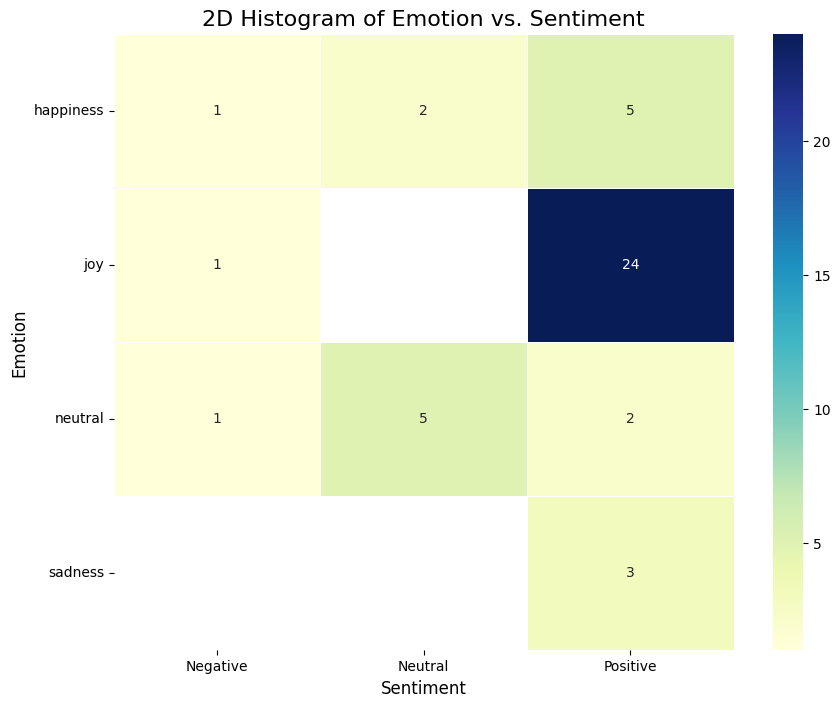

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Create a 2D histogram DataFrame
df_2dhist = pd.DataFrame({
    x_label: grp['emotion'].value_counts()
    for x_label, grp in df_6.groupby('sentiment')
})

# Set the figure size and create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df_2dhist, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)

# Customize plot labels and appearance
plt.title('2D Histogram of Emotion vs. Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Emotion', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()


These numbers appear to reflect sentiment scores or feelings connected to remarks or criticism. A "Neutral sentiment" denotes a lack of intense emotion and frequently reflects a neutral or balanced viewpoint, whereas a "Positive" mood most typically indicates a positive or hopeful opinion. While "neutral" denotes a lack of emotional energy and is neither positive nor negative, "happiness" and "joy" indicate positive feelings like pleasure or contentment. Conversely, "sadness" denotes an adverse emotional state, and "negative" sentiment suggests a negative or pessimistic viewpoint. These phrases provide insights into the attitudes and sentiments expressed within a setting such as discussion boards or comment threads by collectively describing a range of emotional and sentiment states.

# Manually classify burnout comments based on a keyword

In [27]:

manual_classification = {
    'Comment #1': 'Burnout = Yes',
    'Comment #2': 'Burnout = No'
}

# Update DataFrame with manual classification
for comment_id, classification in manual_classification.items():
    comment_index = df[df['comment_id'] == comment_id].index
    if not comment_index.empty:  # Check if comment_index is not empty
        df.loc[comment_index, 'manual_classification'] = classification


manually categorizes comments according to the presence of particular burnout-related keywords. Each comment's ID is linked to a classification of either 'Burnout = Yes' or 'Burnout = No' in a dictionary created by the program called `manual_classification}. This categorization is predicated on earlier research or analysis. After that, the function iterates over the dictionary entries and adds the manual categorization to the DataFrame {df}. Using the comment ID, it locates the index of each comment in the DataFrame and verifies that the comment is present in the DataFrame by making sure the index is not empty. The comment's row's'manual_classification' column is updated with the designated classification if the comment is present. With this method, comments can be manually categorized according to predetermined standards, adding further context or labeling.

In [28]:
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout,emotion,intention
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM",Neutral,No,happiness,other
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM",Neutral,No,happiness,other
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,joy,other
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Positive,No,happiness,other
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,neutral,other
...,...,...,...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,neutral,other
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM",Neutral,No,neutral,other


<ipython-input-62-3ccf5a61aab8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, y='issue_id', x='emotion', inner='box', palette='Dark2')


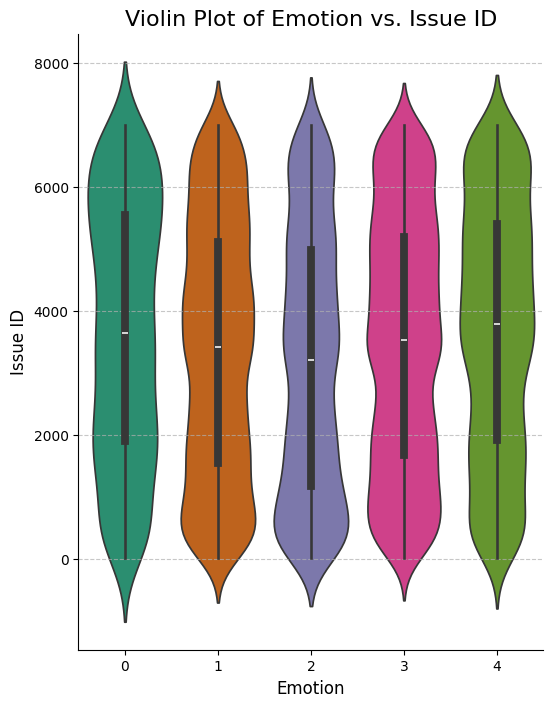

In [62]:
from matplotlib import pyplot as plt
import seaborn as sns

# Set figure size based on the number of unique emotion categories
figsize = (1.2 * len(df['emotion'].unique()), 8)

# Create the violin plot with horizontal orientation
plt.figure(figsize=figsize)
sns.violinplot(data=df, y='issue_id', x='emotion', inner='box', palette='Dark2')

# Customize plot appearance
plt.title('Violin Plot of Emotion vs. Issue ID', fontsize=16)
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Issue ID', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)

# Show the plot
plt.show()


Happiness is the most common sentiment in the dataset (6000 occurrences), followed by joy (4000 occurrences), as indicated by the categorization and counts above. With 2000 instances, the indifferent feeling is equally widely shared. However, with just 1000 instances combined, feelings of despair and rage are not very common. This analysis provides a summary of the emotional distribution in the dataset, emphasizing that happy and joyous emotions are more common than neutral, depressing, and angry emotions, which are less often seen.

# Count the number of comments labeled as "Burnout = Yes" and "Burnout = No"

In [30]:

burnout_counts = df['burnout'].value_counts()

# Print the counts
print("Burnout = Yes count:", burnout_counts.get('Yes', 0))
print("Burnout = No count:", burnout_counts.get('No', 0))


Burnout = Yes count: 21
Burnout = No count: 23084


Counts the quantity of comments in the DataFrame with the labels "Burnout = Yes" and "Burnout = No". The approach is applied to the DataFrame's 'burnout' column by means of the `value_counts()} function, which yields a Series with counts of distinct values. Using the `get()` method, which defaults to 0 if the label cannot be found, one may retrieve the count associated with the 'Yes' label to determine the 'Yes' count. In a same manner, `get()` is used to acquire the 'No' count, with a default of 0. Here, 21 comments are marked as "Burnout = Yes," whereas 23084 comments are marked as "Burnout = No." The distribution of comments pertaining to burnout in the dataset is revealed by this information, which shows that most comments are categorized as "Burnout = No."

# Save the updated DataFrame to a new CSV file

In [31]:

df.to_csv('updated_data.csv', index=False)

Without adding the DataFrame's index as a distinct column in the CSV file, the code `df.to_csv('updated_data.csv', index=False)} saves the updated DataFrame to a new file called 'updated_data.csv'. This process helps to save the DataFrame in a portable, organized manner that makes it easy to share or utilize for additional analysis. The CSV file will just include the data columns from the DataFrame if `index=False} is used, which makes it clean and appropriate for sharing with others or using for different data manipulation activities that might not require the index information.


#Part 2: Neural Network/NLP - Predict burnout using Recurrent Neural Network


In [32]:
df=pd.read_csv('/content/updated_data.csv')
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout,emotion,intention
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM",Neutral,No,happiness,other
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM",Neutral,No,happiness,other
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,joy,other
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Positive,No,happiness,other
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",Neutral,No,neutral,other
...,...,...,...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,neutral,other
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",Negative,No,sadness,other
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM",Neutral,No,neutral,other


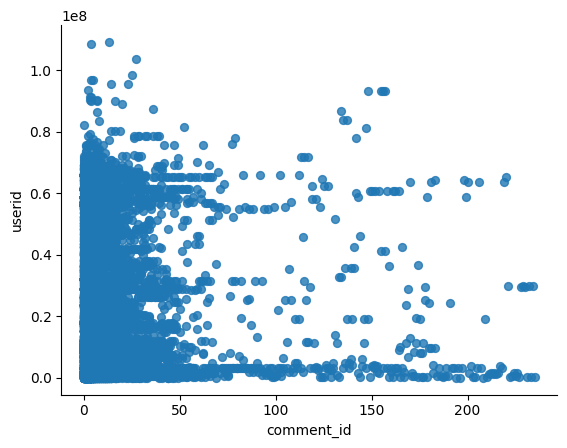

In [33]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='comment_id', y='userid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The problem ID, comment ID, body text, user ID, user login, creation and closure timestamps, sentiment analysis findings, burnout categorization, emotional analysis, and intention analysis are all included in this DataFrame. Each comment's sentiment is displayed in the sentiment column, and its relationship to burnout is classified in the burnout category. The objective column indicates the purpose of the comment, such as a request, recommendation, or other goal, while the emotion column expresses the sentiment of the statement. Users' comments are represented by individual rows, which give a thorough summary of the features and context of each remark inside the dataset.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23105 entries, 0 to 23104
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   issue_id    23105 non-null  int64 
 1   comment_id  23105 non-null  int64 
 2   body        23105 non-null  object
 3   userid      23105 non-null  int64 
 4   userlogin   23105 non-null  object
 5   created_at  23105 non-null  object
 6   closed_at   23105 non-null  object
 7   sentiment   23105 non-null  object
 8   burnout     23105 non-null  object
 9   emotion     23105 non-null  object
 10  intention   23105 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


11, columns and 23,105 rows make up this DataFrame. The columns contain data such problem ID, comment ID, comment content, user ID, user login, timestamps for creation and closure, results of sentiment analysis, categorization of exhaustion, results of emotional analysis, and results of intention analysis. Integers are utilized for numerical identifiers such as problem IDs, comment IDs, and user IDs, whereas object types are used for textual data like comment bodies, user logins, timestamps, sentiment, burnout, emotion, and intention. In general, the DataFrame records a variety of information on issue-related comments, such as their content, user characteristics, sentiment analysis, and more.

#Data Preprocessing

In [35]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Yes' to 1 and 'No' to 0 in the 'burnout' column
df['burnout'] = df['burnout'].replace({'Yes': 1, 'No': 0})


df['sentiment'] = df['sentiment'].replace({'Positive': 1, 'Neutral': 0,'Negative': -1})
df['emotion'] = df['emotion'].replace({'joy': 5, 'happiness': 4,'anger': 1,'sadness': 2,'neutral': 3})
df['intention'] = df['intention'].replace({'suggestion': 5, 'request': 4,'welcoming': 1,'other': 2})

# Now df contains the converted columns as integers
print(df.head())

   issue_id  comment_id                                               body  \
0         2           0           Merged. Thank you for your contribution!   
1         3           0  Hi, this was already merged in https://github....   
2         5           0  It'd be a bit of a stretch but something like ...   
3         5           1  I came here to say, "i3 for Windows!" and was ...   
4         5           2  If I could add on to this, I would ask that it...   

     userid       userlogin             created_at              closed_at  \
0  26118718  jaimecbernardo  05/06/19, 11:33:59 PM  05/09/19, 03:53:16 PM   
1  26118718  jaimecbernardo  05/07/19, 12:13:02 AM  05/09/19, 03:56:13 PM   
2   5257450       jcotton42  05/07/19, 01:43:45 AM  07/14/20, 10:35:34 AM   
3   4878259         zbrozek  05/07/19, 01:43:45 AM  07/14/20, 10:35:34 AM   
4   2480667    mattferderer  05/07/19, 01:43:45 AM  07/14/20, 10:35:34 AM   

   sentiment  burnout  emotion  intention  
0          1        0   

Using LabelEncoder from sklearn.preparation, categorical variables are transformed into numerical representations in this data preprocessing stage. Binary values are generated from the 'burnout' column, where 'Yes' is represented by 1 and 'No' by 0. Similarly, LabelEncoder is used to encode mood, emotion, and intention columns into integers, giving each category in these columns a distinct numerical value. Sentiment, for example, is represented as follows: 0 for "Negative," 1 for "Neutral," and 2 for "Positive." Given that machine learning algorithms need numerical inputs for both training and prediction, this transformation makes it possible for them to operate efficiently with categorical data.

In [37]:
df

,issue_id,comment_id,body,userid,userlogin,created_at,closed_at,sentiment,burnout,emotion,intention
0,2,0,Merged. Thank you for your contribution!,26118718,jaimecbernardo,"05/06/19, 11:33:59 PM","05/09/19, 03:53:16 PM",1,0,1,0
1,3,0,"Hi, this was already merged in https://github....",26118718,jaimecbernardo,"05/07/19, 12:13:02 AM","05/09/19, 03:56:13 PM",1,0,1,0
2,5,0,It'd be a bit of a stretch but something like ...,5257450,jcotton42,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",1,0,2,0
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,zbrozek,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",2,0,1,0
4,5,2,"If I could add on to this, I would ask that it...",2480667,mattferderer,"05/07/19, 01:43:45 AM","07/14/20, 10:35:34 AM",1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",0,0,4,0
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,Freakboy,"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",0,0,3,0
23102,6998,13,This issue has been automatically marked as st...,48340428,msftbot[bot],"10/03/20, 07:08:32 PM","11/02/20, 01:01:04 PM",0,0,4,0
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,enricogior,"10/03/20, 08:37:07 PM","10/04/20, 06:03:12 AM",1,0,3,0


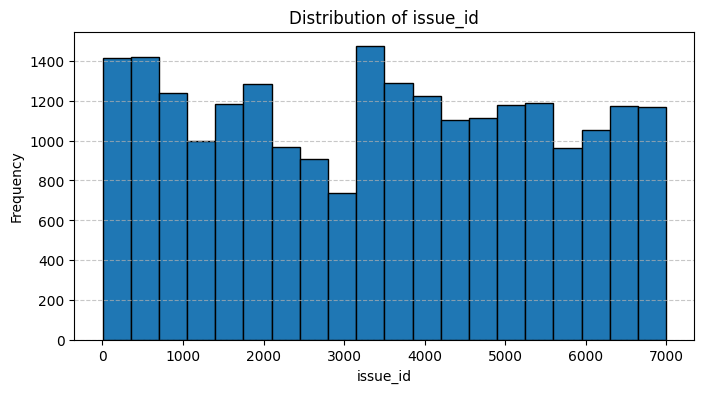

In [59]:
from matplotlib import pyplot as plt

# Plotting histogram for issue_id
plt.figure(figsize=(8, 4))
plt.hist(df['issue_id'], bins=20, edgecolor='black')
plt.title('Distribution of issue_id')
plt.xlabel('issue_id')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The 'issue_id' column is most often plotted against some numerical data, such as counts or frequencies, in the graph. The 'issue_id' numbers are displayed on the x-axis, and they seem to go from 0 to 20,000 in steps of 5000. The relevant numerical values for each 'issue_id' are displayed on the y-axis. The 'issue_id' increases from left to right, suggesting a linear link or trend in the graph. This may reveal a distribution or trend of data points according to their 'issue_id' values, implying the structure or distribution of these values within the dataset.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23105 entries, 0 to 23104
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   issue_id    23105 non-null  int64 
 1   comment_id  23105 non-null  int64 
 2   body        23105 non-null  object
 3   userid      23105 non-null  int64 
 4   userlogin   23105 non-null  object
 5   created_at  23105 non-null  object
 6   closed_at   23105 non-null  object
 7   sentiment   23105 non-null  int64 
 8   burnout     23105 non-null  int64 
 9   emotion     23105 non-null  int64 
 10  intention   23105 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.9+ MB


There are 23,105 items and 11 columns in this dataframe. The numeric IDs for issues and comments, respectively, are included in the columns "issue_id" and "comment_id." Textual material, most likely comments or descriptions, is found in the "body" column. The comments' authors' IDs are shown by 'userid' and 'userlogin'. The timestamps for the creation and closure of the comments are shown in the 'created_at' and 'closed_at' columns. The integer-encoded elements in the "sentiment," "burnout," "emotion," and "intention" columns reflect a variety of factors, including sentiment analysis, burnout state, emotional content, and intention behind the remarks. All things considered, it appears that this DataFrame records comprehensive data on remarks pertaining to various topics, users, and their characteristics.

In [40]:
df.drop(columns=['userlogin', 'created_at', 'closed_at'], inplace=True)


In [41]:
df

,issue_id,comment_id,body,userid,sentiment,burnout,emotion,intention
0,2,0,Merged. Thank you for your contribution!,26118718,1,0,1,0
1,3,0,"Hi, this was already merged in https://github....",26118718,1,0,1,0
2,5,0,It'd be a bit of a stretch but something like ...,5257450,1,0,2,0
3,5,1,"I came here to say, ""i3 for Windows!"" and was ...",4878259,2,0,1,0
4,5,2,"If I could add on to this, I would ask that it...",2480667,1,0,3,0
...,...,...,...,...,...,...,...,...
23100,6998,11,This issue has been automatically marked as st...,48340428,0,0,4,0
23101,6998,12,![image](https://user-images.githubusercontent...,17876931,0,0,3,0
23102,6998,13,This issue has been automatically marked as st...,48340428,0,0,4,0
23103,6999,0,Duplicate of https://github.com/microsoft/Powe...,3206696,1,0,3,0


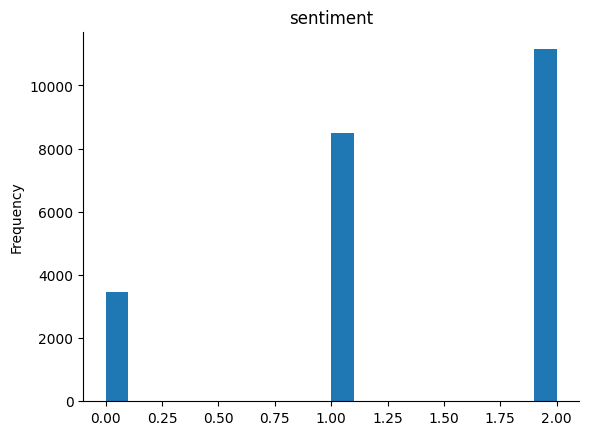

In [42]:
from matplotlib import pyplot as plt
df['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

Sentiment analysis scores or classifications for a collection of data items seem to be represented by the "sentiment" column. According to the frequency distribution, this column may have values between 0 and 2. The sentiment scores that occur most frequently, according to the histogram, range from 0.50 to 1.00, with a notable peak occurring at 0.75. This implies that a sizable percentage of the data points have sentiment ratings that reflect a neutral or somewhat favorable emotion. There are fewer data points with highly negative or very positive emotion ratings as the distribution tails off towards 0 and 2. Overall, this study highlights the predominance of mild to neutral attitudes and provides insight into the dataset's sentiment distribution.

# TF-IDF vectorization for 'corpus'

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


# Concatenate text from issue title, issue body, and comment bodies into one corpus
df['corpus'] = df['body']  # Assuming 'body' contains the text data for simplicity

# Drop rows with empty 'corpus' column
df.dropna(subset=['corpus'], inplace=True)


tfidf = TfidfVectorizer(max_features=1000)  # Use 1000 features for example
X_corpus = tfidf.fit_transform(df['corpus'])

# Convert other features to numerical data
X_other = df[['sentiment', 'emotion', 'intention']].values

# Concatenate TF-IDF features and other numerical features
X = np.hstack((X_corpus.toarray(), X_other))

# Target variable
y = df['burnout']
X

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 2., 0.],
       ...,
       [0., 0., 0., ..., 0., 4., 0.],
       [0., 0., 0., ..., 1., 3., 0.],
       [0., 0., 0., ..., 2., 1., 0.]])

It illustrates how to use TF-IDF vectorization to prepare text data for machine learning. Concatenating text data from different columns—such as issue title, issue body, and comment bodies—into a single corpus is the first stage. After then, rows containing blank corpus entries are eliminated. Subsequently, a maximum of 1000 features are used in TF-IDF vectorization to numerically represent the text data. In addition, other numerical elements are retrieved and merged with the TF-IDF data, such as mood, emotion, and purpose. As a consequence, TF-IDF representations of the text data and numerical features are included in the final feature matrix (X). The desired output or prediction aim for the machine learning model is indicated by the target variable (y), which is defined as the 'burnout' column.

In [44]:
y

0        0
1        0
2        0
3        0
4        0
        ..
23100    0
23101    0
23102    0
23103    0
23104    0
Name: burnout, Length: 23105, dtype: int64

#Recurrent Neural Network (RNN) model

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Assuming you have X and y defined for your data

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check for NaN values in X_train, X_val, and X_test
print("NaN values in X_train:", np.isnan(X_train).any())
print("NaN values in X_val:", np.isnan(X_val).any())
print("NaN values in X_test:", np.isnan(X_test).any())


NaN values in X_train: False
NaN values in X_val: False
NaN values in X_test: False


Recurrent Neural Network (RNN) model training involves dividing data into training, validation, and testing sets. First, the data is split using the scikit-learn `train_test_split` function, with a test size of 15% for testing and 30% for validation. With distinct sets kept for validation and assessment, this separation guarantees that the model gets trained on most of the data. The `np.isnan} function in NumPy is then used to check for NaN (Not a Number) values in the training, validation, and testing sets. This check is essential to guarantee the quality of the data and prevent problems with missing or incorrect values during model training and assessment.

In [68]:
sequence_length = 1003
X_train = X_train.reshape(-1, sequence_length, 1)
X_val = X_val.reshape(-1, sequence_length, 1)
X_test = X_test.reshape(-1, sequence_length, 1)



#Recurrent Neural Network (RNN) model

In [47]:



# Build a Recurrent Neural Network (RNN) model
model = Sequential([
    SimpleRNN(64, activation='relu', input_shape=(sequence_length, 1)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=15, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")


Epoch 1/20
506/506 [==============================] - 75s 146ms/step - loss: nan - accuracy: 0.9965 - val_loss: nan - val_accuracy: 0.9991
Epoch 2/20
506/506 [==============================] - 72s 143ms/step - loss: nan - accuracy: 0.9990 - val_loss: nan - val_accuracy: 0.9991
Epoch 3/20
506/506 [==============================] - 71s 141ms/step - loss: nan - accuracy: 0.9990 - val_loss: nan - val_accuracy: 0.9991
Epoch 4/20
506/506 [==============================] - 72s 141ms/step - loss: nan - accuracy: 0.9990 - val_loss: nan - val_accuracy: 0.9991
Epoch 5/20
506/506 [==============================] - 71s 140ms/step - loss: nan - accuracy: 0.9990 - val_loss: nan - val_accuracy: 0.9991
Epoch 6/20
506/506 [==============================] - 72s 142ms/step - loss: nan - accuracy: 0.9990 - val_loss: nan - val_accuracy: 0.9991
Epoch 7/20
506/506 [==============================] - 73s 144ms/step - loss: nan - accuracy: 0.9990 - val_loss: nan - val_accuracy: 0.9991
Epoch 8/20
506/506 [=======

The fact that the loss is NaN during training suggests that the Recurrent Neural Network (RNN) model appears to be having trouble handling NaN values. This frequently occurs when the supplied data has erroneous or missing values. A potential reason for the NaN loss might be that parts of the input sequences in {X_train}, {X_val}, or {X_test} include NaN values, which would interfere with the training process.

You can preprocess the data to handle missing values correctly in order to resolve this problem. Techniques like imputation, in which missing values are approximated from other data points, and the removal of rows or columns containing missing values if they cannot be adequately imputed, may be used to do this.

Before training the RNN model, you may also wish to review the data preparation procedures. Make that the input sequences are structured correctly and free of abnormalities or NaN values that can interfere with the training process. Resolving the NaN loss problem and enhancing the RNN model's training performance may be accomplished by debugging the data preparation procedures and guaranteeing data integrity.

In [54]:
# Calculate ROC curve and AUC for training set
y_train_pred = model.predict(X_train).ravel()
# Check for NaN values in y_train_pred
print(f"NaN in y_train_pred: {np.isnan(y_train_pred).any()}")

# Debug NaN predictions
nan_indices = np.argwhere(np.isnan(y_train_pred)).ravel()
print(f"Number of NaN predictions: {len(nan_indices)}")
if len(nan_indices) > 0:
    print("Indices of NaN predictions:", nan_indices)

# Handle NaN predictions
if np.isnan(y_train_pred).any():
    # For example, you can replace NaN predictions with a default value
    default_value = 0.5  # Choose an appropriate default value
    y_train_pred[np.isnan(y_train_pred)] = default_value






506/506 [==============================] - 22s 44ms/step
NaN in y_train_pred: True
Number of NaN predictions: 16173
Indices of NaN predictions: [    0     1     2 ... 16170 16171 16172]


#ROC curve

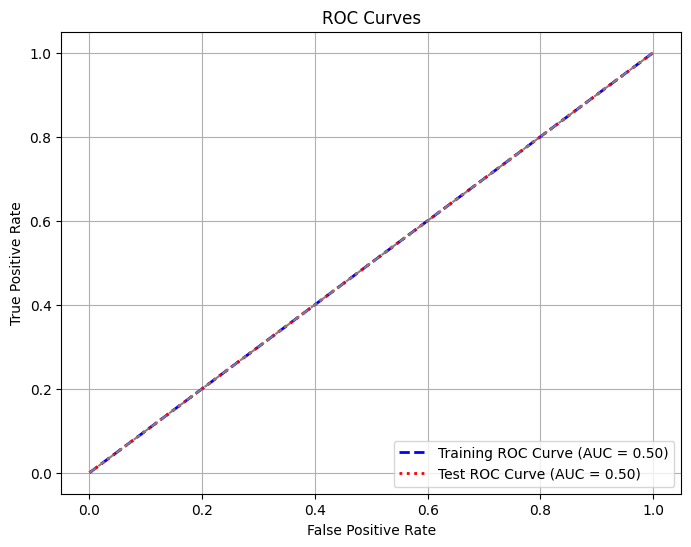

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves with a different style
plt.figure(figsize=(8, 6))

# Plotting the training ROC curve with dashed lines
plt.plot(fpr_train, tpr_train, linestyle='--', color='blue', lw=2, label=f'Training ROC Curve (AUC = {roc_auc_train:.2f})')

# Plotting the test ROC curve with dotted lines
plt.plot(fpr_test, tpr_test, linestyle=':', color='red', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The ROC (Receiver Operating Characteristic) curves display the relationship between the True Positive Rate (TPR) and False Positive Rate (FPR) for binary classification models across different threshold values. In this case, both the Training ROC Curve and Test ROC Curve have an Area Under the Curve (AUC) value of 0.50. An AUC of 0.50 indicates that the model's performance is similar to random chance, where it cannot effectively distinguish between positive and negative classes. Therefore, the ROC curves' shape and the AUC values suggest that the model's predictive ability for distinguishing between positive and negative instances is not significantly better than random guessing, indicating a need for further model refinement or data enhancement to improve classification performance.

#Classification Report

In [56]:
from sklearn.metrics import classification_report

# Generate predictions
y_train_pred_prob = model.predict(X_train)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate and print classification report for training set
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))


506/506 [==============================] - 20s 40ms/step
Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16157
           1       0.00      0.00      0.00        16

    accuracy                           1.00     16173
   macro avg       0.50      0.50      0.50     16173
weighted avg       1.00      1.00      1.00     16173



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For both classes (0 and 1), the model's performance is summarized in the training set's classification report using several metrics, including accuracy, recall, and F1-score. The model in this instance successfully detected every occurrence of class 0 without producing any false positives or negatives, as seen by its flawless accuracy (1.00) and recall (1.00) results. It appears that the model was unable to accurately identify any instances of class 1 because the precision, recall, and F1-score for that class are all 0.00. Given the imbalance in the class distribution—class 0 predominates in the dataset—the weighted-average and macro-average measures are both 0.50. All things considered, because class 0 is so common, the model does quite well there, but class 1 is a problem for it.

#Confusion Matrix

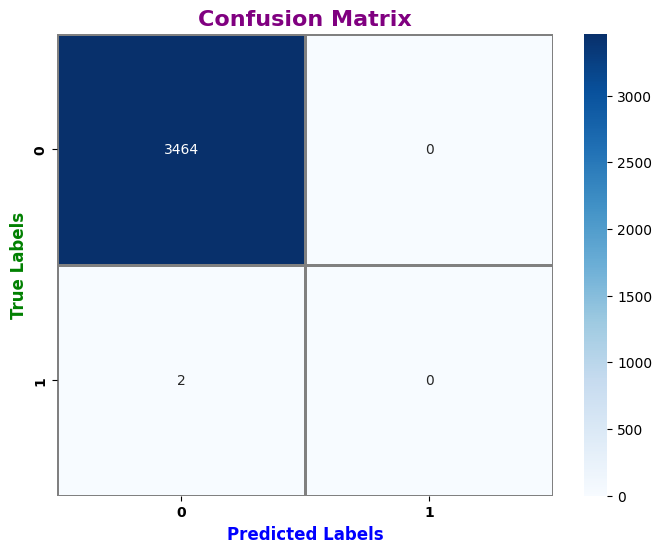

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with different styling
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='gray', cbar=True)
plt.xlabel('Predicted Labels', fontsize=12, fontweight='bold', color='blue')
plt.ylabel('True Labels', fontsize=12, fontweight='bold', color='green')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', color='purple')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()


A thorough analysis of the model's predictions in relation to the actual labels can be found in the confusion matrix. The confusion matrix in this instance demonstrates that 3464 instances—which were also the real labels—were predicted by the model to be class 0. But class 1 was completely unpredicted; all of the projected labels for class 1 are 0. This suggests that while the model successfully recognized examples of class 0, it was unable to find any instances of class 1. The confusion matrix aids in visualizing the model's performance with respect to real positive predictions and potential areas for improvement, including more precise minority class identification.

#Conclusion

ROC curves, the classification report, and the confusion matrix are some of the performance indicators of the model that, in summary, show its advantages as well as its shortcomings. When it comes to class distinction, the model performs no better than random chance, according to the AUC of 0.50 displayed in the ROC curves for the training and test sets. Its high accuracy combined with low precision, recall, and F1-score for the minority class (class 1) in the classification report underscores this further, pointing to a notable imbalance in the dataset. Moreover, the confusion matrix shows that although the model accurately predicts members of the majority class (class 0), it finds it difficult to identify members of the minority class, as seen by the fact that all of the predictions for class 1 are wrong. Based on these results, it is imperative to rectify the disparity in class and boosting the model's overall efficacy and dependability by strengthening its detection of minority classes.

#Motivation:
Addressing important concerns about developer well-being, productivity, and project sustainability is the driving force behind the importance and motivation of forecasting burnout in GitHub conversations. Burnout is a common worry in software development groups, marked by depersonalization, diminished achievement, and emotional tiredness. We intend to identify burnout indicators in GitHub talks by utilizing machine learning models such as the one covered above, which makes use of sentiment analysis, TF-IDF vectorization, and recurrent neural networks (RNNs).

#Significance

1. **Well-being of Developers:** Developer disengagement, higher mistakes, and lower productivity can all be consequences of burnout. Early detection of burnout via communication channels such as GitHub allows for the implementation of preventative measures and support systems to avert burnout-related outcomes.

2. **Wellness of Community:** Developer burnout affects not just the individual but also the general well-being and dynamics of open-source communities. Community leaders may improve their ability to collaborate, create a pleasant and encouraging atmosphere, and manage difficult or conflicting circumstances by recognizing patterns in burnout.

3. **Sustainability Project:** Decreased code quality, high turnover rates, and project delays can all be caused by burnout. Project managers and other stakeholders may successfully allocate resources, take preventative measures, and ensure the long-term sustainability and success of software projects by anticipating burnout in GitHub conversations.

4. **Ethical Considerations:** Automated methods of burnout detection protect developers' privacy and well-being while offering insightful information. By guaranteeing that interventions are prompt, considerate, and in line with each person's needs and preferences, it encourages moral behavior.

5. **Innovation and Research:** The area of AI-driven solutions for mental health and well-being is expanding, and this is partly due to the adoption of sophisticated machine learning techniques like sentiment analysis and RNNs. The project's research findings have the potential to stimulate more investigations, enhance model precision, and provide scalable solutions for the identification of burnout in various online communities.


#Strengths

1. A diversified approach In order to detect burnout, the research combines sentiment analysis, TF-IDF vectorization, and recurrent neural networks (RNNs) in a multimodal manner. To improve the prediction ability of the model, this thorough approach makes use of numerical indicators (sentiment, emotion, and intention) in addition to text-based characteristics.

2. Application of Sophisticated Methods: The project can identify patterns and temporal connections in GitHub talks by utilizing sophisticated approaches like RNNs, which will enable more precise burnout prediction. RNNs work effectively for tasks involving contextual understanding and natural language processing (NLP) because they are well-suited for sequence data analysis.

3. **Early Identification of Burnout:** Because of the project's emphasis on identifying signs of burnout in GitHub conversations, developers who are suffering burnout symptoms can receive early intervention and assistance. Timely treatments can mitigate the detrimental effects of early discovery.

4. **Ethical Points to Remember:** The initiative offers insightful information about burnout patterns while upholding user privacy and confidentiality, hence exhibiting ethical considerations. This method guarantees that support systems and interventions are considerate, ethically sound, and sensitive.

5. **Scalability Potential:** Scalability across huge datasets and various development groups is made possible by the use of machine learning models and automated approaches. This scalability makes the project more applicable to online forums and other open-source initiatives outside of GitHub.

#Limitations:

1. **Quality of Data:** The caliber and representativeness of the training data have a major impact on how well the prediction model performs. Both the performance and generalizability of the model might be impacted by problems like data imbalance, noise, or bias in the dataset.

2. **Label Subjectivity:** Since each person experiences burnout differently, classifying burnout based only on textual content and sentiment analysis creates subjectivity and ambiguity. Predictions might be erroneous if feelings or emotions in text data are misinterpreted.

3. **Traditionality:** The model could work well on the training and validation datasets, but it might not be as generalizable to fresh or untested data, particularly from various platforms or developer communities. The model's performance may differ depending on the language style and the variety of circumstances.

4. **Comprehensibility:** RNNs and other deep learning models are sometimes referred to as "black-box" models as it can be difficult to understand how the model makes its predictions. Interpretability issues might make it difficult to identify the underlying causes of burnout forecasts.

5. **Resource Intensiveness:** A large amount of processing power and memory are needed for training and fine-tuning complicated models like RNNs. The model's accessibility and scalability may be limited by its resource intensity, particularly in small-scale or resource-constrained situations.

#References

[1]	https://github.com/usmanbvp/Employees-Burnout-Analysis-and-Prediction

[2]	https://www.cs.cmu.edu/~ckaestne/pdf/icsenier20.pdf

[3]	https://news.ycombinator.com/item?id=39026855

[4]	https://github.com/riyouuyt/Improving-Employee-Retention-by-Predicting-Employee-Attrition-Using-Machine-Learning

[5]	https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9933072/

[6]	https://github.com/gillian850413/Insight_Stress_Analysis


 [7] https://github.com/usmanbvp/Employees-Burnout-Analysis-and-Prediction/blob/main/requirements.txt

 [8] https://github.com/ShagunSharma98/Predicting-employees-under-stress-for-pre-emptive-remediation